# Week 4 - Introduction to Text Data

This notebook provides an introduction to the basic tools for text analytics.

## Set up and load data

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents. 

In [4]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups() # object is a dictionary
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Data Set Characteristics:

In [5]:
print(data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [6]:
W, y = data.data, data.target
n_samples = y.shape[0]
n_samples

11314

In [7]:
y[:10] # news story categories

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [8]:
doc = W[0]
doc

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

## Make a pandas dataframe

In [9]:
df = pd.DataFrame(W,columns=['text'])
df['topic'] = y
df.head()

,text,topic
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


# Working with Text Data

In [10]:
import nltk
nltk.download('stopwords') 
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/elliott/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/elliott/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Iterate over some documents:

In [11]:
from gensim.utils import simple_preprocess

processed = []
# iterate over rows
for i, text in enumerate(W):
    document = simple_preprocess(text) # get sentences/tokens
    processed.append(document) # add to list
    if i > 100:
        break

In [12]:
processed[0][:10]

['from',
 'lerxst',
 'wam',
 'umd',
 'edu',
 'where',
 'my',
 'thing',
 'subject',
 'what']

## Removing unicode characters

In [13]:
# !pip install unidecode
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


## Translation

In [14]:
# !pip install googletrans
from googletrans import Translator
translator = Translator()
lang = translator.detect('이 문장은 한글로 쓰여졌습니다.').lang
lang

'ko'

In [15]:
eng = translator.translate('이 문장은 한글로 쓰여졌습니다.',
                           src=lang,
                           dest='en')
eng.text

'This sentence is written in Hangul.'

# Quantity of Text

Count words per document.

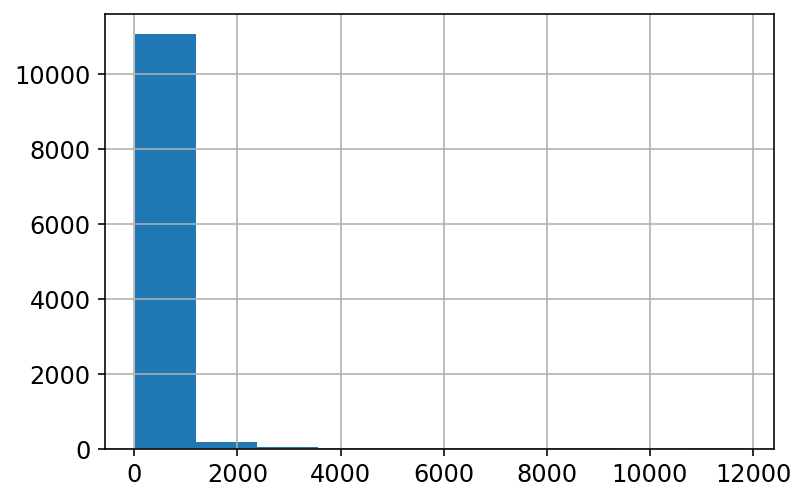

In [16]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our data
df['num_words'] = df['text'].apply(get_words_per_doc)
df['num_words'].hist()

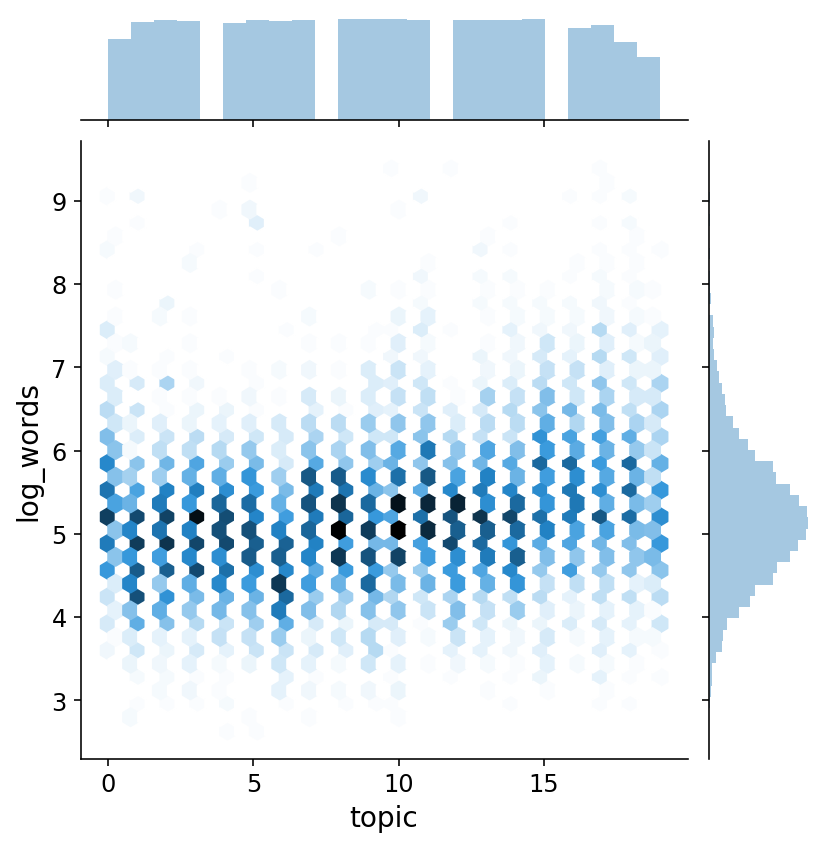

In [17]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='topic', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [18]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 1357),
 ('of', 645),
 ('to', 578),
 ('and', 548),
 ('a', 532),
 ('in', 427),
 ('i', 370),
 ('is', 360),
 ('that', 300),
 ('for', 250),
 ('it', 193),
 ('on', 189),
 ('you', 173),
 ('have', 161),
 ('be', 158),
 ('-', 156),
 ('with', 156),
 ('this', 148),
 ('are', 142),
 ('>', 140)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [19]:
# Dictionary-Based Sentiment Analysis
# nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity = sid.polarity_scores(doc)
print(polarity)

{'neg': 0.012, 'neu': 0.916, 'pos': 0.072, 'compound': 0.807}


In [137]:
# sample 20% of the dataset
dfs = df.sample(frac=.2) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['text'].apply(get_sentiment)

In [138]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['text']]

['\nSubject: CLINTON: AM Press Briefing by Dee Dee Myers -- 4.15.93\nOrganization: Project GNU, Free Sof',
 '10 Medical Newsletter, Part 2/4\nReply-To: david@stat.com (David Dodell)\nDistribution: world\nOrganiza',
 "\nSubject: CLINTON: President's Remarks at Town Hall Meeting\nOrganization: MIT Artificial Intelligenc",
 '\nSubject: Final Public Dragon Magazine Update (Last chance for public bids)\nKeywords: Dragon Magazin',
 '\nSubject: CLINTON: Background BRiefing in Vancouver 4.4.93\nOrganization: Project GNU, Free Software ']

In [139]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['text']]

['OSE OF FALKLANDS WAR\nOrganization: University of Wisconsin Eau Claire\nLines: 918\n\n\n\nSECRET PURPOSE O',
 'ct: Re: Need info on 43:1 and suicide for refutation\nOrganization: Ideology Busters, Inc.\nDistributi',
 ' e)\nSubject: Re: Sinus vs. Migraine (was Re: Sinus Endoscopy)\nOrganization: Bellcore, Livingston, NJ',
 'ews in LATVIA - some documents\nArticle-I.D.: zuma.9304052018\nReply-To: sera@zuma.UUCP (Serdar Argic)',
 'year the Turkish Nation is mourning and praying again for...\nReply-To: sera@zuma.UUCP (Serdar Argic)']

## StopWords

In [21]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
stopwords = set([x for x in stopwords if x != 'against']) # exception

In [141]:
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

10499

In [142]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

18302

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [143]:
import re

docs = dfs[:5]['text']

# Extract words after Subject.
for doc in docs:    
    print(re.findall(r'Subject: \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Subject: SECRET ']
['Subject: Gun ']
[]
[]
['Subject: This ']


In [144]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['IN-VISIBILITY', 'wind-swept', 'so-called', 'longer-range', 'so-called', 'two-thirds', 'semi-permanent', 'far-off', 'so-called', 'fast-approaching', 'so-called', 'up-to', 'anti-Bolshevik', 'long-range', 'two-prong', 'Rockefeller-controlled', 'full-fledged', 'all-out', 'so-called', 'then-President', 'over-all', 'so-called', 'particle-beam', 'man-made', 'then-Secretary', 'newly-launched', 'nuclear-powered', 'so-called', 'war-planes', 'Stealth-field', 'three-phase', 'war-room', 'all-out', 'anti-Bolshevik', 'anti-Bolshevik', 'so-called', 'slow-down', 'anti-Bolshevik', 'Rockefeller-Russian', 'mid-February', 'Bolshevik-controlled', 'long-standing', 'scrap-metal', 'work-site', 'year-old', 'long-standing', 'far-off', 'Rockefeller-Russian', 'high-speed', 'Rockefeller-Russian', 'Rockefeller-Russian', 'so-called', 'blast-proof', 'Rockefeller-Russian', 'mid-Atlantic', 'Rockefeller-Russian', 'hollowed-out', 'beam-weapon', 'Range-Finding', 'non-homing', 'non-nuclear', 'pseudo-smile', 'Rockefeller-R

In [145]:
# extract email addresses
for i, doc in enumerate(docs):
    finder = re.finditer('\w+@.+\.\w\w\w', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (6, 29) mcelwre@cnsvax.uwec.edu
0 (274, 291) eidetics@cerf.net
1 (6, 27) lvc@cbnews.cb.att.com
1 (11768, 11784) cipriani@att.com
2 (6, 33) jer@prefect.cc.bellcore.com
3 (6, 19) sera@zuma.UUC
3 (121, 134) sera@zuma.UUC
3 (202, 249) 50D@unix.amherst.edu> nwbernst@unix.amherst.edu
4 (6, 19) sera@zuma.UUC
4 (121, 134) sera@zuma.UUC


In [146]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [147]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [148]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [149]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

In [150]:
df.uncertainty.mean()

0.00017677214071062401

In [151]:
df[df.uncertainty]

,text,topic,num_words,log_words,uncertainty
2350,From: ld231782@longs.lance.colostate.edu (L. D...,11,8569,9.055906,True
4682,From: ld231782@longs.lance.colostate.edu (L. D...,11,8520,9.050172,True


# Featurizing Texts

In [152]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [153]:
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [154]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [155]:
# 
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [156]:
# Capitalization
text_lower = text.lower() # go to lower-case
text_lower

"prof. zurich hailed from zurich. she got 3 m.a.'s from eth."

In [157]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

prof zurich hailed from zurich she got 3 mas from eth


In [158]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [159]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [160]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['prof', 'zurich', 'hailed', 'zurich', 'got', '#', 'mas', 'eth']


In [161]:
# scikit-learn stopwords
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [162]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:10]

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across']

In [163]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in ['tax','taxes','taxed','taxation']]
print(tokens_stemmed)

['tax', 'tax', 'tax', 'taxat']


In [164]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [165]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
[wnl.lemmatize(c) for c in ['corporation', 'corporations', 'corporate']]

['corporation', 'corporation', 'corporate']

Let's wrap it into a recipe.

In [166]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the corpus.

In [167]:
df['tokens_cleaned'] = df['text'].apply(normalize_text)
df['tokens_cleaned']

0        [lerxstwamumdedu, where, thing, subject, car, ...
1        [guykuocarsonuwashingtonedu, guy, kuo, subject...
2        [twillisececnpurdueedu, thoma, e, willi, subje...
3        [jgreenamb, joe, green, subject, weitek, p9000...
4        [jcmheadcfaharvardedu, jonathan, mcdowel, subj...
                               ...                        
11309    [jimzisfeinfactorycom, jim, zisfein, subject, ...
11310    [ebodinpearltuftsedu, subject, screen, death, ...
11311    [westesnetcomcom, est, subject, mount, cpu, co...
11312    [stevehcrlgw, steven, collin, subject, sphere,...
11313    [gunningccocaltechedu, kevin, j, gun, subject,...
Name: tokens_cleaned, Length: 11314, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [168]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [169]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the corpus.

In [170]:
df['tokens_simple'] = df['text'].apply(simple_preprocess)
df['tokens_simple']

0        [from, lerxst, wam, umd, edu, where, my, thing...
1        [from, guykuo, carson, washington, edu, guy, k...
2        [from, twillis, ec, ecn, purdue, edu, thomas, ...
3        [from, jgreen, amber, joe, green, subject, re,...
4        [from, jcm, head, cfa, harvard, edu, jonathan,...
                               ...                        
11309    [from, jim, zisfein, factory, com, jim, zisfei...
11310    [from, ebodin, pearl, tufts, edu, subject, scr...
11311    [from, westes, netcom, com, will, estes, subje...
11312    [from, steve, hcrlgw, steven, collins, subject...
11313    [from, gunning, cco, caltech, edu, kevin, gunn...
Name: tokens_simple, Length: 11314, dtype: object

## Tagging Parts of Speech

In [171]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives by topic

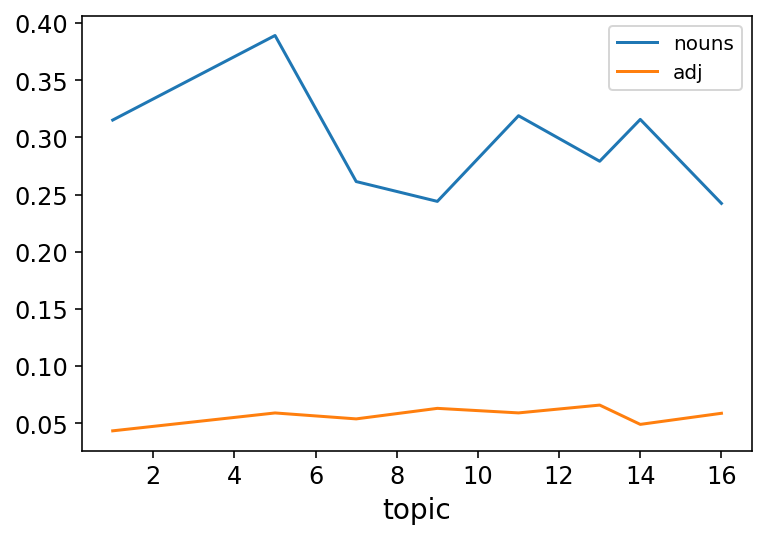

In [190]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N']) / len(tags)
    num_adj = len([t for t in tags if t[0] == 'J']) / len(tags)
    return num_nouns, num_adj

dfs['nouns'], dfs['adj'] = zip(*dfs['text'].map(get_nouns_adj))
dfs.groupby('topic')[['nouns','adj']].mean().plot()

# Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [173]:
dfs = df.sample(10)
dfs['doc'] = dfs['text'].apply(nlp)

In [174]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[10]
sent1 # sentence

I'd bet

In [175]:
# tokens
list(sent1) 

[I, 'd, bet, ]

In [176]:
# lemmas
[x.lemma_ for x in sent1]

['-PRON-', 'would', 'bet', '\n']

In [177]:
# POS tags
[x.tag_ for x in sent1]

['PRP', 'MD', 'VB', '_SP']

# N-grams

In [178]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 41),
 (('subject:', 're:'), 37),
 (('in', 'the'), 33),
 (('to', 'the'), 27),
 (('i', 'am'), 21),
 (('i', 'have'), 21),
 (('to', 'be'), 19),
 (('on', 'the'), 18)]

In [179]:
# spacy NER noun chunks
i = 0
chunks = list(nlp(df['text'].iloc[10]).noun_chunks)
chunks

[irwin@cmptrc.lonestar.org (Irwin Arnstein,
 Subject,
 Recommendation,
 Duc,
 Summary,
 What,
 it,
 Distribution,
 usa,
 Sat, 1 May 1993 05:00:00 GMT
 Organization,
 CompuTrac Inc.,
 Keywords,
 Ducati,
 GTS,
 Lines,
 I,
 a line,
 a Ducati 900GTS 1978 model,
 17k,
 the clock,
 Runs,
 paint,
 the bronze/brown/orange,
 a bit,
 oil,
 pops,
 1st,
 hard accel,
 The shop,
 trans and oil 
 leak,
 They,
 the bike,
 the 1 and only owner,
 They,
 I,
 Any opinions,
 me,
 Thanks,
 It,
 a nice stable mate,
 the Beemer,
 I,
 a jap bike,
 myself,
 "Tuba,
 Irwin,
 I,
 I,
 CompuTrac-Richardson,
 Tx,
 DoD #0826          (R75/6]

# Tokenizers

In [180]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 13),
 ('sabbath', 6),
 ('to', 6),
 ('is', 6),
 ('that', 5),
 ('i', 4),
 ('one', 4),
 ('of', 4),
 ('have', 3),
 ('this', 3),
 ('on', 3),
 ('not', 3),
 ('been', 2),
 ('and', 2),
 ('with', 2),
 ('at', 2),
 ('argument', 2),
 ('those', 2),
 ('since', 2),
 ('a', 2)]

Usually we use scikit-learn's vectorizer.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.001, # at min 0.1% of docs
                        max_df=.8, # drop if shows up ih more than 80%  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3)) # words, bigrams, and trigrams
X = vec.fit_transform(df['text'])

# save the vectors
# pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
#pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [28]:
X

<11314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 526707 stored elements in Compressed Sparse Row format>

In [29]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [30]:
X_tfidf

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 521387 stored elements in Compressed Sparse Row format>

Make word cloud of common words by topic id.

In [185]:
df['topic'].value_counts() 

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: topic, dtype: int64

In [186]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100'],
 ['writes article',
  'written',
  'wrong',
  'wrote',
  'year',
  'years',
  'years ago',
  'yes',
  'york',
  'young'])

1


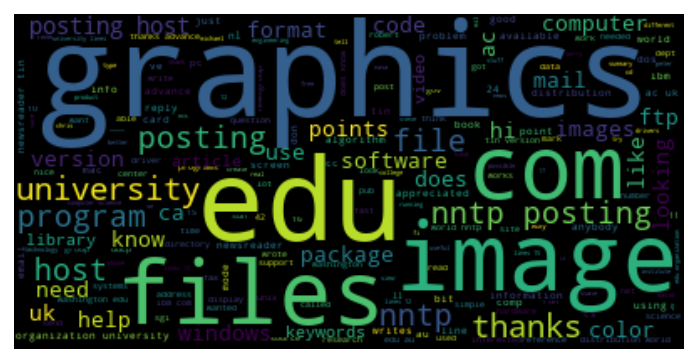

2


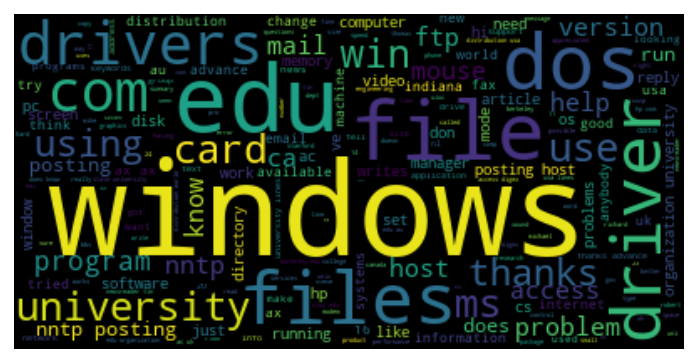

8


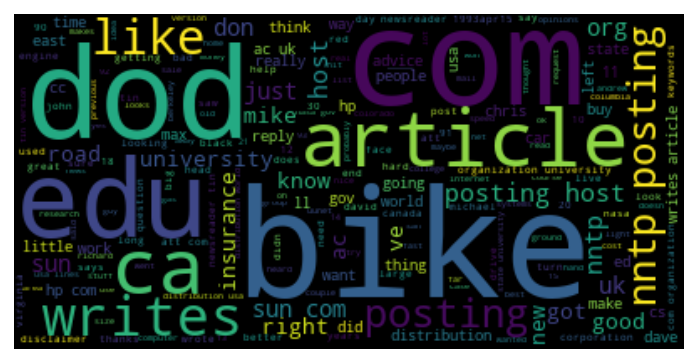

9


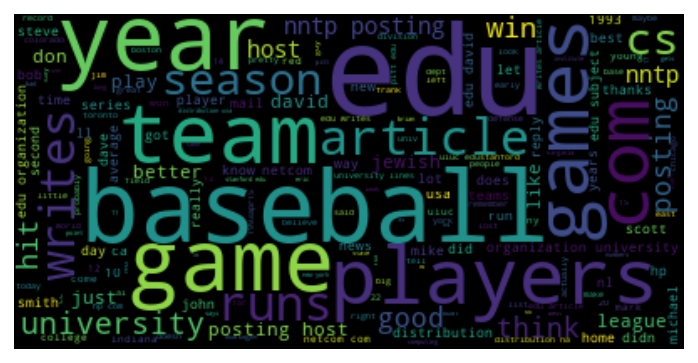

In [193]:
#!pip install wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

In [188]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['text'])
X_hash

<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

# Feature Selection

In [194]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['topic']==1
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['friend',
 'pub',
 'file',
 'cmu edu',
 'form',
 'image',
 'away',
 'avoid',
 'ii',
 'government']

In [195]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [ ]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

In [ ]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

# Document Distance

In [31]:
# compute pair-wise similarities between all documents in corpus"
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X[:100])
sim.shape

(100, 100)

In [33]:
sim[:4,:4]

array([[1.        , 0.20384233, 0.15095711, 0.19219753],
       [0.20384233, 1.        , 0.12569587, 0.1608558 ],
       [0.15095711, 0.12569587, 1.        , 0.16531366],
       [0.19219753, 0.1608558 , 0.16531366, 1.        ]])

In [34]:
# TF-IDF Similarity
tsim = cosine_similarity(X_tfidf[:100])
tsim[:4,:4]

array([[1.        , 0.05129256, 0.08901433, 0.06064389],
       [0.05129256, 1.        , 0.07497709, 0.03570566],
       [0.08901433, 0.07497709, 1.        , 0.09077347],
       [0.06064389, 0.03570566, 0.09077347, 1.        ]])

In [32]:
11000*11000

121000000